Importar Librerías

In [ ]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Cargar conjunto de datos , Normalización y Construcción modelo

In [ ]:
# Cargar el dataset de cifar 100
cifar_100 = keras.datasets.cifar100
# Cargue la divisidn de entrenamiento y prueba del conjunto de datos cifar 100
(training_images, training_labels), (test_images, test_labels) = cifar_100.load_data()

# Normalizar los valores de pixeles del tren y probar las imagenes.
training_images = training_images / 255.0
test_images = test_images / 255.0

# Construir el modelo de clasificacion.
model = keras.models. Sequential ([
    # Agregar convoluciones y max pooling
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(2, 2),
    # Agrega las mismas capas que antes.
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               921728    
                                                                 
 dense_3 (Dense)             (None, 100)               12900     
                                                                 
Total params: 935524 (3.57 MB)
Trainable params: 935524 (3.57 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

Compilación del modelo

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Entrenamiento del modelo

Epoch 1/20
782/782 [==============================] - 34s 43ms/step - loss: 3.9389 - accuracy: 0.1049
Epoch 2/20
782/782 [==============================] - 35s 45ms/step - loss: 3.2550 - accuracy: 0.2182
Epoch 3/20
782/782 [==============================] - 37s 47ms/step - loss: 3.0173 - accuracy: 0.2642
Epoch 4/20
782/782 [==============================] - 34s 43ms/step - loss: 2.8756 - accuracy: 0.2897
Epoch 5/20
782/782 [==============================] - 35s 45ms/step - loss: 2.7787 - accuracy: 0.3062
Epoch 6/20
782/782 [==============================] - 34s 43ms/step - loss: 2.6945 - accuracy: 0.3248
Epoch 7/20
782/782 [==============================] - 35s 45ms/step - loss: 2.6226 - accuracy: 0.3405
Epoch 8/20
782/782 [==============================] - 34s 43ms/step - loss: 2.5489 - accuracy: 0.3538
Epoch 9/20
782/782 [==============================] - 35s 45ms/step - loss: 2.4744 - accuracy: 0.3681
Epoch 10/20
782/782 [==============================] - 34s 43ms/step - loss: 2.421

<Axes: >

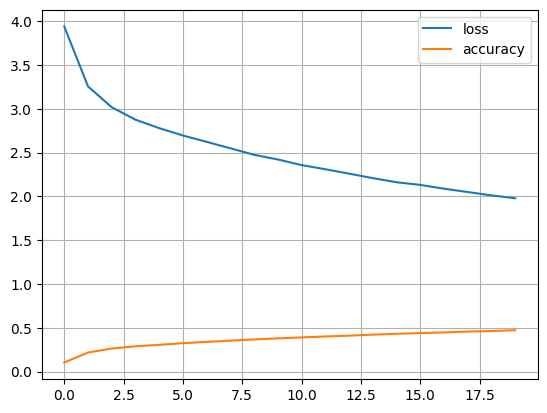

In [ ]:
# Entrenar el modelo
history = model.fit(training_images,training_labels, epochs=20, batch_size=64)
# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)

Evaluación del modelo

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print ("Precisión en el conjunto de prueba:", accuracy)

1563/1563 [==============================] - 13s 8ms/step - loss: 1.9024 - accuracy: 0.4875
Pérdida en el conjunto de entrenamiento: 1.9023979902267456
Precisión en el conjunto de entrenamiento: 0.4874800145626068
313/313 [==============================] - 2s 8ms/step - loss: 2.8327 - accuracy: 0.3183
Pérdida en el conjunto de prueba: 2.8327414989471436
Precisión en el conjunto de prueba: 0.3183000087738037


Predicción

In [ ]:
#predict

index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: [33]
1/1 [==============================] - 0s 139ms/step
Classification:
 [[1.11200034e-05]
 [2.21237846e-04]
 [1.07458094e-03]
 [9.28965583e-03]
 [9.67770582e-04]
 [4.95900284e-04]
 [1.70346684e-05]
 [4.16629046e-05]
 [1.21930160e-03]
 [3.06429388e-03]
 [2.83501111e-04]
 [9.46686021e-04]
 [1.12512603e-03]
 [6.12975622e-04]
 [5.13640662e-05]
 [7.94654014e-04]
 [3.76201910e-03]
 [2.61705049e-04]
 [2.85430788e-03]
 [1.15821115e-03]
 [6.23762571e-06]
 [6.76325383e-03]
 [2.90682045e-04]
 [1.47345258e-04]
 [1.45203160e-06]
 [3.60106380e-04]
 [3.51760500e-05]
 [3.17590986e-03]
 [7.00060162e-04]
 [7.60337524e-03]
 [2.05229517e-04]
 [2.98914108e-02]
 [1.75846387e-02]
 [3.00766695e-02]
 [1.22111524e-02]
 [8.84078327e-04]
 [2.03236705e-04]
 [2.38141115e-03]
 [9.26743895e-02]
 [1.50928460e-03]
 [5.98640763e-04]
 [2.33424398e-05]
 [2.25734450e-02]
 [2.14393460e-03]
 [1.56867958e-03]
 [6.09265524e-04]
 [1.84904120e-03]
 [1.05428662e-05]
 [1.21983999e-06]
 [1.25267115e-05]
 [1.01714376e-02]


Preparación de datos

In [ ]:
print(test_labels[:30])

[[49]
 [33]
 [72]
 [51]
 [71]
 [92]
 [15]
 [14]
 [23]
 [ 0]
 [71]
 [75]
 [81]
 [69]
 [40]
 [43]
 [92]
 [97]
 [70]
 [53]
 [70]
 [49]
 [75]
 [29]
 [21]
 [16]
 [39]
 [ 8]
 [ 8]
 [70]]


Selección Imágenes de Interes

In [ ]:
FIRST_IMAGE=8
SECOND_IMAGE=5
THIRD_IMAGE=14
print(test_labels[FIRST_IMAGE])
print(test_labels[SECOND_IMAGE])
print(test_labels[ THIRD_IMAGE])

[23]
[92]
[40]


Visualización de Imágenes

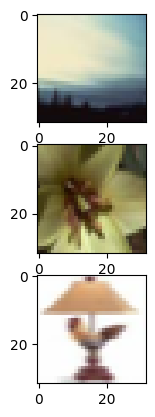

In [ ]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

Extracción de activaciones

In [ ]:
layer = 0
filter1 = 0
filter2 = 10
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

Visualización de Convoluciones

1/1 [==============================] - 0s 26ms/step


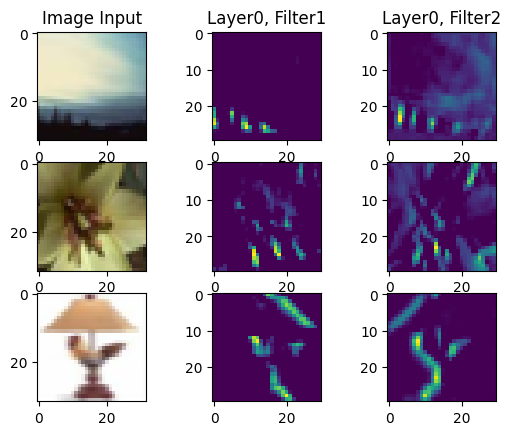

In [ ]:
f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0,0]. imshow(test_images[FIRST_IMAGE])

f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[0, 1].set_title("Layer"+ str(layer) +", Filter1")
axarr[0,1].imshow(f1[0, : , :, filter1])
axarr[0,2].set_title("Layer"+ str(layer) +", Filter2")
axarr[0,2].imshow(f1[0, : , :, filter2])
axarr[1,0].imshow(test_images[SECOND_IMAGE])

f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[1,1].imshow(f2[0, : , :, filter1])
axarr[1,2]. imshow(f2[0, : , :, filter2])
axarr[2,0].imshow(test_images[THIRD_IMAGE])

f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[2,1].imshow(f3[0, : , :, filter1])
axarr[2,2].imshow(f3[0, : , :, filter2])

Selección Imágenes de Interés

In [ ]:
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=18
print(test_labels[FIRST_IMAGE])
print(test_labels[SECOND_IMAGE])
print(test_labels[ THIRD_IMAGE])

[49]
[14]
[70]


Visualización de Imágenes

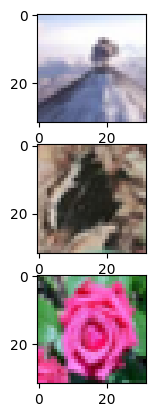

In [ ]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

Extracción de activaciones

In [ ]:
layer = 0
filter1 = 0
filter2 = 10
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

Visualización Convoluciones

1/1 [==============================] - 0s 20ms/step


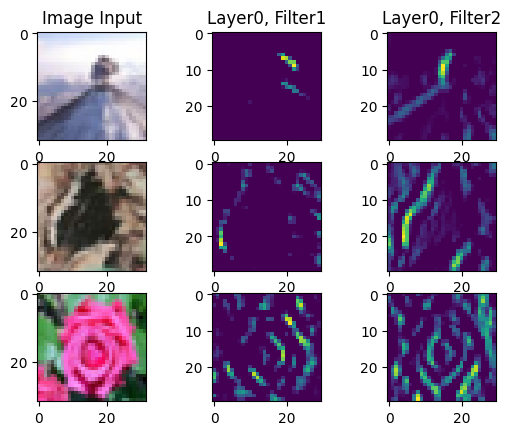

In [ ]:
f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0,0]. imshow(test_images[FIRST_IMAGE])

f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[0, 1].set_title("Layer"+ str(layer) +", Filter1")
axarr[0,1].imshow(f1[0, : , :, filter1])
axarr[0,2].set_title("Layer"+ str(layer) +", Filter2")
axarr[0,2].imshow(f1[0, : , :, filter2])
axarr[1,0].imshow(test_images[SECOND_IMAGE])

f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[1,1].imshow(f2[0, : , :, filter1])
axarr[1,2]. imshow(f2[0, : , :, filter2])
axarr[2,0].imshow(test_images[THIRD_IMAGE])

f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[2,1].imshow(f3[0, : , :, filter1])
axarr[2,2].imshow(f3[0, : , :, filter2])